# Project 4: Cd-Aufnahme über die Nahrung bei Folsomia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()
from scipy import stats
import pandas as pd
from copy import deepcopy
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os
import pyarrow

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

# automatische aktualisierung externer Python-Dateien
%load_ext autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

In [2]:
from mempyDEB.DEBODE.simulators import *
from mempyDEB.DEBODE.defaultparams import *

## Start by fitting the model to control data

In [3]:
from DEBfitting_Folsomia import *
data = load_data()
data.head()

,t_day,length_mm,C_F,T_cels,S
85,0,0.609,0,20,1.420620
86,2,0.723,0,20,1.999511
87,4,0.857,0,20,2.805551
88,7,1.019,0,20,3.960986
89,9,1.095,0,20,4.571232


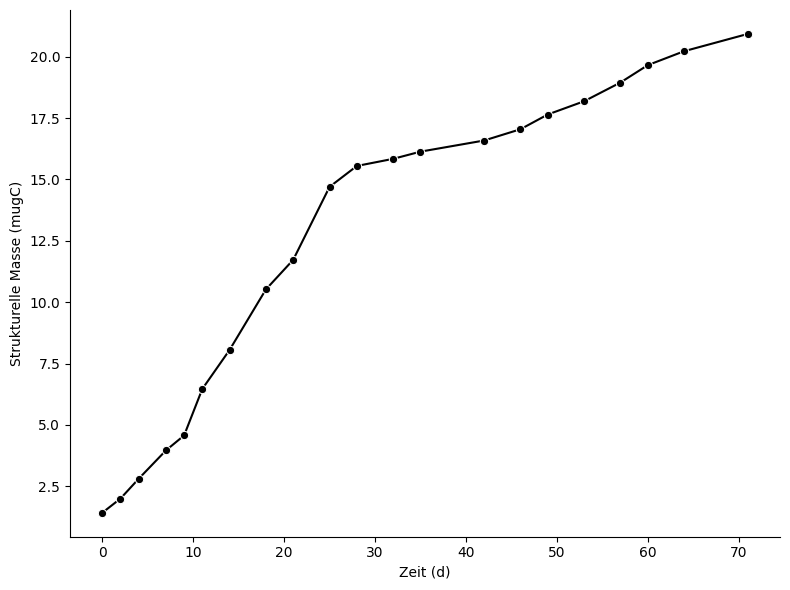

In [4]:
_ = plot_data(data)

c:\Users\Felix\projects\mem25\project\mempyDEB\folsomia_project\DEBfitting_Folsomia.py:89: RuntimeWarning: invalid value encountered in scalar power
  p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'Idot_max_rel': np.float64(4.5482062001716725), 'eta_AS_0': np.float64(0.4064455981275471)}


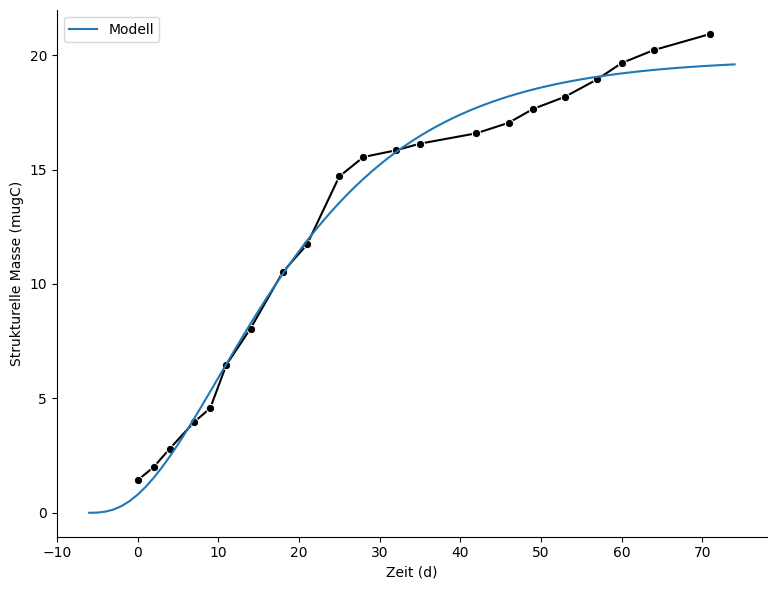

In [24]:
f = fit_model()

c:\Users\Felix\projects\mem25\project\mempyDEB\folsomia_project\DEBfitting_Folsomia.py:89: RuntimeWarning: invalid value encountered in scalar power
  p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'Idot_max_rel': np.float64(4.5482062001716725), 'eta_AS_0': np.float64(0.4064455981275471)}


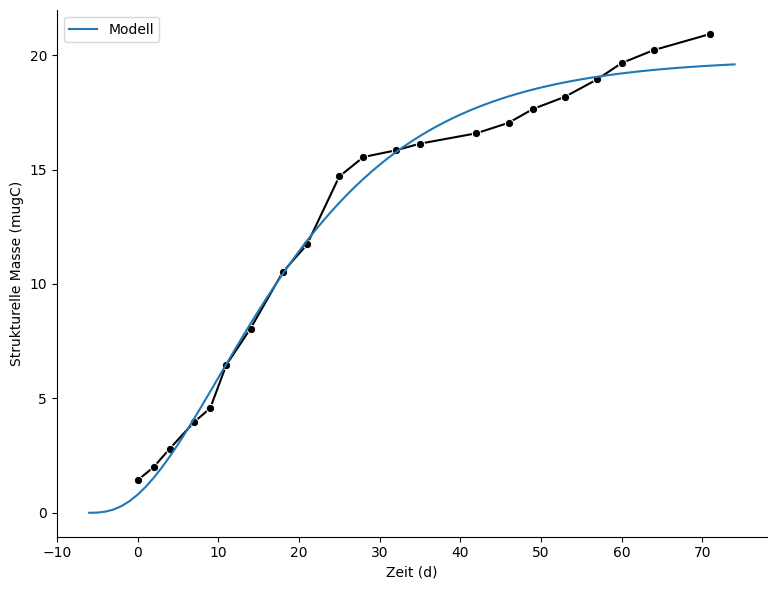

In [6]:
def fit_model_2params():
    """
    DEB-Modellkalibrierung mit zwei Parametern.
    """

    # Definition des ModelFit - Objektes wie zuvor
    f = setup_modelfit() 
    
    # wir müssen hier lediglich den initial guess anpassen
    f.intguess = { 
        'Idot_max_rel' : f.defaultparams.spc['Idot_max_rel'], 
        'eta_AS_0' : f.defaultparams.spc['eta_AS_0']
    }

    # am restlichen Code ändert sich ersmtal nichts

    f.run_optimization()

    print(f"Estimated parameter values: {f.p_opt}")

    # simulate optimized parameters, 

    p = deepcopy(f.defaultparams)
    p.spc.update(f.p_opt)  

    sim_opt = f.simulator(p.spc)

    # plot data + retrodiction

    fig, ax = plot_data(f.data)

    sns.lineplot(sim_opt, x = 't_day', y = 'S', ax = ax, label = "Modell")
    #sns.lineplot(sim_opt, x = 't_day', y = 'cum_repro', ax = ax[1])

    #ax[1].legend()

    return f
 
f_2params = fit_model_2params()

control_fitted_params = f_2params.p_opt


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'Idot_max_rel': np.float64(10.554175307932255), 'kappa': np.float64(0.3896207366759158), 'eta_AS_0': np.float64(0.38158595557283403), 'eta_AI_0': np.float64(0.40615988807185677)}


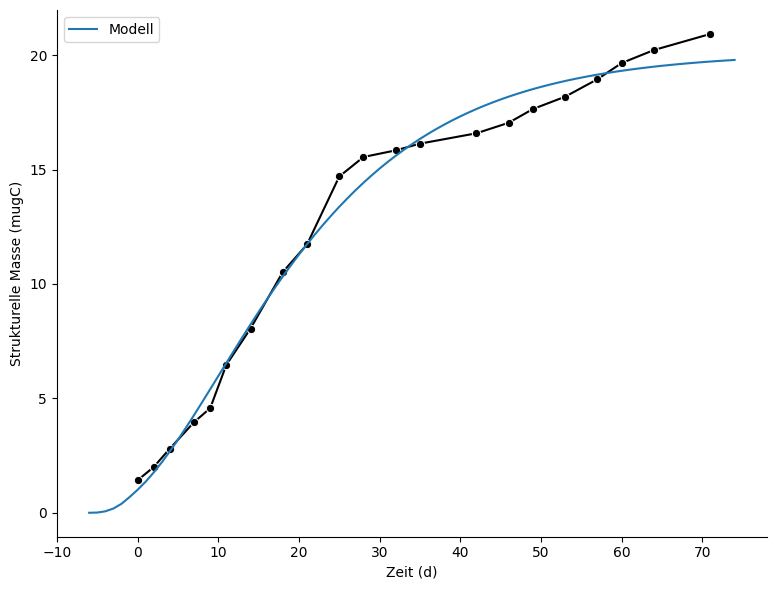

In [7]:
# def define_simulator_4params(f: ModelFit):

#     """
#     Definition der Simulator-Funktion für DEB-Kalibrierung mit drei Parametern.
#     """

#     def simulator(theta: dict) -> tuple: # theta = rand(priors)

        p = deepcopy(f.defaultparams)
        p.spc.update(theta) 
        """
        S_max_theta = calc_S_max(p.spc) # implizierte maximale Struktur auf basis von theta
        zoom_factor_theta = S_max_theta / S_MAX_REFERENCE # zoom factor auf basis von theta
        
        # diese Parameter skalieren mit der neuen maximalen Größe
        
        p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)
        p.spc['X_emb_int'] *= zoom_factor_theta
        #p.spc['S_p'] *= zoom_factor_theta
        """
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            prediction = simulate_DEBBase(p).assign(
                cum_repro = lambda df : np.trunc(df.R / p.spc['X_emb_int']).shift(EMB_DEV_TIME, fill_value = 0)
                ).rename({'t' : 't_day'}, axis = 1)

#             return prediction
        
#     return simulator

# def fit_model_4params():
#     """
#     DEB-Modellkalibrierung mit 4 Parametern.
#     """
#     # Definition des ModelFit - Objektes wie zuvor
    
#     f = setup_modelfit() 
    
#     f.simulator = define_simulator_4params(f)

#     f.intguess = { 
#         'Idot_max_rel' : f.defaultparams.spc['Idot_max_rel'], 
#         'kappa' : f.defaultparams.spc['kappa'],
#         'eta_AS_0' : f.defaultparams.spc['eta_AS_0'],
#         'eta_AI_0' : f.defaultparams.spc['eta_IA_0']
        
#     }

#     f.run_optimization()

#     print(f"Estimated parameter values: {f.p_opt}")

#     # simulate optimized parameters, 

#     p = deepcopy(f.defaultparams)
#     p.spc.update(f.p_opt)  

#     sim_opt = f.simulator(p.spc)

#     # plot data + retrodiction

#     fig, ax = plot_data(f.data)

#     sns.lineplot(sim_opt, x = 't_day', y = 'S', ax = ax, label = "Modell")
#     #sns.lineplot(sim_opt, x = 't_day', y = 'cum_repro', ax = ax[1])

#     ax.legend()

#     return f
 
# f_4params = fit_model_4params()

# control_fitted_params = f_4params.p_opt



In [8]:
control_fitted_params

{'Idot_max_rel': np.float64(10.554175307932255),
 'kappa': np.float64(0.3896207366759158),
 'eta_AS_0': np.float64(0.38158595557283403),
 'eta_AI_0': np.float64(0.40615988807185677)}

### Bayesian Inference

In [ ]:
f.define_lognorm_prior()
f.run_bayesian_inference(
    popsize = 35,
    max_total_nr_simulations = 1_000)

In [ ]:
f.retrodict()
fig,ax = plot_data(f.data)

for df in f.retrodictions:
    
    sns.lineplot(df, x = 't_day', y = 'S', ax = ax, alpha = .2, color = 'gray')

## use control fit to fit TKTD model

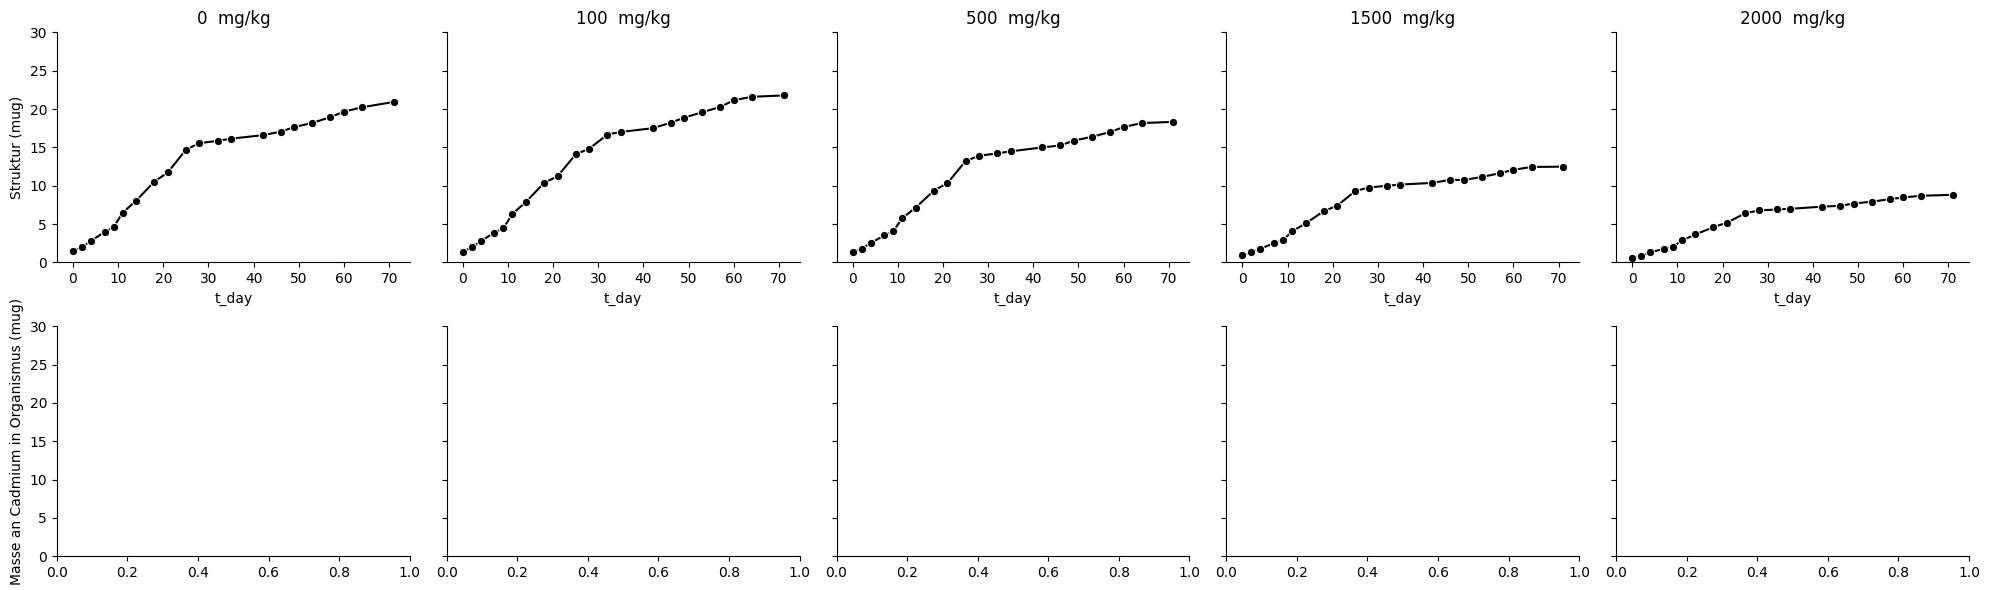

In [9]:
from TKTDFitting_Folsomia import *

data = load_data()
fig, ax = plot_data(data)


ValueError: Could not interpret value `Cd_in` for `y`. An entry with this name does not appear in `data`.

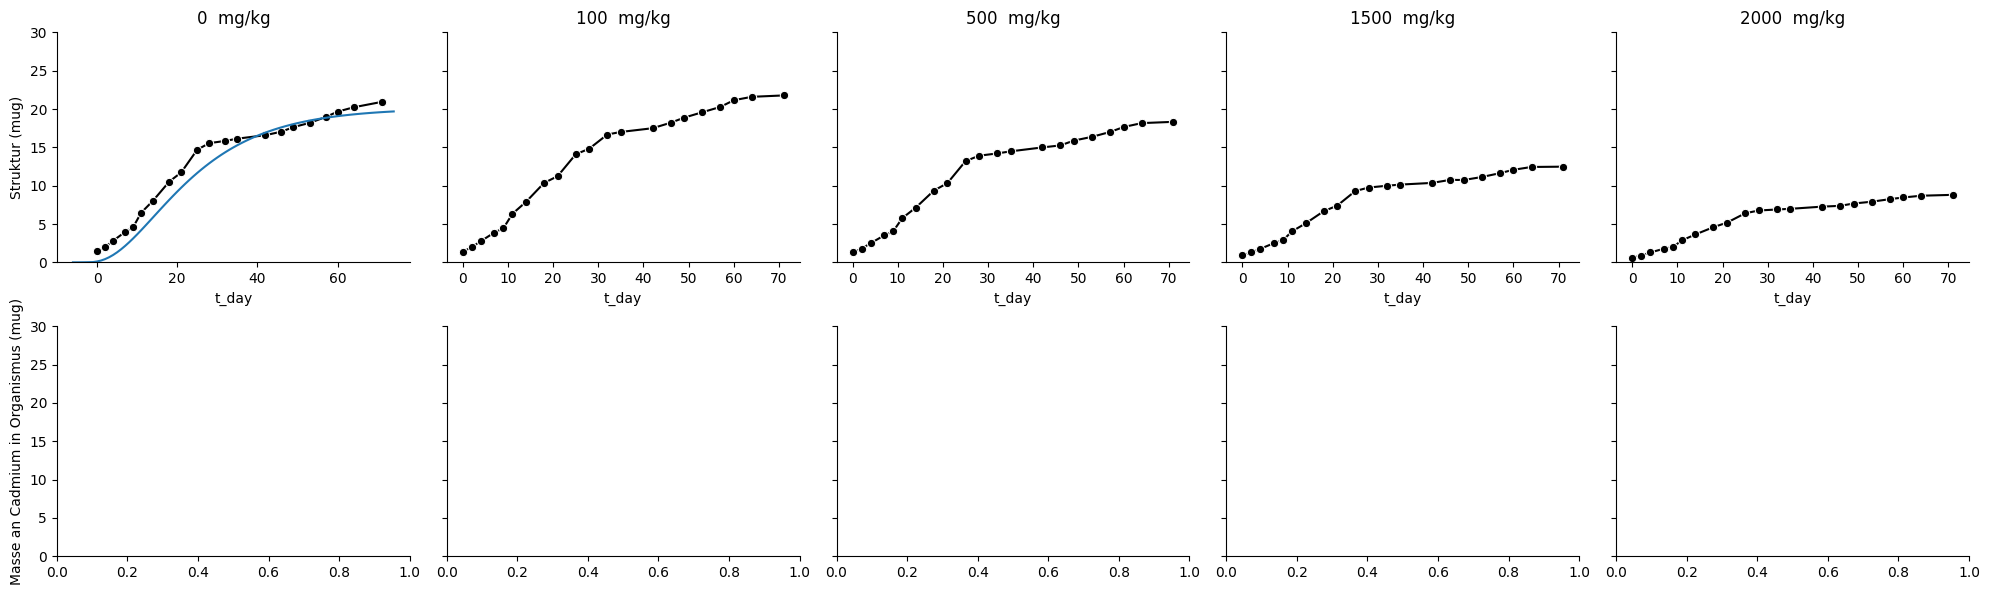

In [10]:
f = setup_modelfit()
f.defaultparams.spc.update(control_fitted_params)

sim_intguess = f.simulator(control_fitted_params)
data = load_data()
fig, ax = plot_data(data)

plot_sim(ax, sim_intguess)


## trying out different PMoA

## fitting different levels of Cd-exposition from food ingestion/assimilation